<a href="https://colab.research.google.com/github/vaniasahdaa/skripsi/blob/main/scen3_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Module

In [1]:
import pandas as pd
import numpy as np
import string
import re

## Read CSV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
telegram_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/scen3_telegram_review_labelled.csv')
print(telegram_review)
telegram_review.head()

                    date           userName  rating  \
0    2023-07-31 17:14:15              &-&9-       1   
1     2023-07-31 8:34:34      Rohmatadis354       5   
2     2023-07-31 7:53:11           tiririis       3   
3     2023-07-31 3:23:24             Ova ok       5   
4     2023-07-31 3:22:17  Fransiskus_Solano       5   
..                   ...                ...     ...   
327  2022-08-31 19:30:57  Mantan Orang Kaya       5   
328  2022-08-15 13:40:55            sjjdheh       5   
329   2022-07-15 2:34:14           wonberry       5   
330  2022-07-13 15:43:27      ahakdkalapwjd       5   
331   2022-07-12 8:07:27          j03hanafi       4   

                                                review  \
0    jujur sangat kecewa banget pernah download trs...   
1                                            Very good   
2    maaf min mau tanya saya mau log in telegram ta...   
3                                            Very Good   
4                                            Very

,date,userName,rating,review,title,Natan,Grace,Vania,Final
0,2023-07-31 17:14:15,&-&9-,1,jujur sangat kecewa banget pernah download trs...,kecewa,Negatif,Negatif,Negatif,Negatif
1,2023-07-31 8:34:34,Rohmatadis354,5,Very good,Very good,Positif,Positif,Positif,Positif
2,2023-07-31 7:53:11,tiririis,3,maaf min mau tanya saya mau log in telegram ta...,trouble,Negatif,Negatif,Negatif,Negatif
3,2023-07-31 3:23:24,Ova ok,5,Very Good,Evaluation,Positif,Positif,Positif,Positif
4,2023-07-31 3:22:17,Fransiskus_Solano,5,Very good,Telegram,Positif,Positif,Positif,Positif


## Mengurangi Kolom

In [4]:
telegram_review.drop(columns = ['date', 'userName', 'title', 'Natan', 'Grace', 'Vania'], inplace = True)
telegram_review.columns = ['rating', 'review','Final']
telegram_review.head()

,rating,review,Final
0,1,jujur sangat kecewa banget pernah download trs...,Negatif
1,5,Very good,Positif
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif
3,5,Very Good,Positif
4,5,Very good,Positif


In [5]:
review = telegram_review['review']

## Install Library Demoji - Untuk Menghapus Emoji

In [6]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00


In [7]:
import demoji
demoji.download_codes()

<ipython-input-7-eb011a9810ad>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


## Case Folding

In [8]:
def case_folding(text):
    #Mengubah uppercase menjadi lowercase
    text = text.lower()
    #Menghilangkan tanda baca
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    #Menghapus angka
    text = re.sub(r'\d', ' ', text)
    #Menghapus pangkat pada kalimat
    text = ''.join([i for i in text if ord(i) < 128])
    #Mengganti line baru dengan spasi
    text = re.sub("\n", " ", text)
    #Menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    #Menghapus symbol
    symbol_pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(symbol_pattern, '', text)
    #Menghapus spasi di awal dan akhir kalimat
    text = text.strip()
    #Menghapus spasi berlebih
    text = re.sub('\s+', ' ', text)
    #Menghapus Emoji
    text = demoji.replace(text, ' ')
    return text

## Menampilkan Data yang Sudah di Case Folding

In [9]:
telegram_review['clean'] = [case_folding(i) for i in review]
review = telegram_review['clean']
telegram_review.head(150)

,rating,review,Final,clean
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good
4,5,Very good,Positif,very good
...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...
148,1,Lemot,Negatif,lemot


## Translasi Data

### Install Translator

In [10]:
pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00


### Translasi

In [11]:
from deep_translator import GoogleTranslator
# Define a function to translate text
def translate_text(text, target_language='id'):
    translated = GoogleTranslator(source='auto', target=target_language).translate(text)
    return translated

### Menampilkan Hasil Translasi

In [12]:
# Apply the translation function to the 'review' column
telegram_review['translated_review'] = telegram_review['clean'].apply(translate_text)
# Print the translated reviews
review = telegram_review['translated_review']

telegram_review.head(150)

,rating,review,Final,clean,translated_review
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus
4,5,Very good,Positif,very good,sangat bagus
...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,Tolong diperbaiki kalau tiba-tiba ingin keluar...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku dn...
148,1,Lemot,Negatif,lemot,lemot


## Formalisasi Data

In [13]:
# Membaca dataset dari dua file dataset
dataset = eval(open("/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/combined_slang_words.txt").read())

# Create a regular expression pattern to match keys from the dataset
pattern = re.compile(r'\b(' + '|'.join(dataset.keys()) + r')\b')

#print(pattern)

# Initialize an empty list to store the transformed words
content = telegram_review['translated_review']

# Iterate through each word in the input text
j = 0
for i in content:
    filter_data = pattern.sub(lambda x: dataset[x.group()], i)
    content[j] = filter_data.lower()
    j+=1

# Return the transformed text as a list of words
 #return content

<ipython-input-13-236c7adf5d87>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content[j] = filter_data.lower()


In [14]:
print(content)

0      jujur sangat kecewa sekali pernah download ter...
1                                           sangat bagus
2      maaf min mau tanya saya mau log in telegram ta...
3                                           sangat bagus
4                                           sangat bagus
                             ...                        
327    canggih, keren dan fitur-fitur yang tidak ada ...
328    ingin mengucapkan terima kasih kepada pendiri ...
329        uda paling bner gausah ditambahin fitur story
330    lihat di tiktok kalau foundernya ga mengambil ...
331                                           keren kali
Name: translated_review, Length: 332, dtype: object


## Menampilkan Hasil Formalisasi

In [15]:
telegram_review['formalized'] = content
# review = telegram_review['formalized']

telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus
...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...
148,1,Lemot,Negatif,lemot,lambat,lambat


## Stemming

### Instal Library Sastrawi

In [16]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


### Proses Stemming

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize the Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to perform stemming using Sastrawi
def stem_text(text):
    return stemmer.stem(text)

telegram_review['stemmed'] = telegram_review['formalized'].apply(stem_text)
review = telegram_review['stemmed']

### Menampilkan Hasil Stemming

In [18]:
telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri di...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat


## Stopword

### Install NTLK

In [19]:
pip install --user -U nltk

In [20]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
daftar_remove = stopwords.words('indonesian')

### Proses Stopword

In [22]:
data_neg = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/negative.txt', 'r')
neg = data_neg.read()

data_pos = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/positive.txt', 'r')
pos = data_pos.read()

data_pos_neg = pos + neg
list_pos_neg = data_pos_neg.split('\n')

final_list = list(set(daftar_remove) - set(list_pos_neg))

stopword = telegram_review['stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))

### Menampilkan Hasil Stopword

In [23]:
telegram_review['stopword'] = stopword
review = telegram_review['stopword']

telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
...,...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri di...,tolong baik keluar suka batas simpan nama duro...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...,coba hubung email minggu tanggap
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat,lambat


In [ ]:
#telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_preprocessed.csv', header=True, index=False)

## Tokenizing

## Menampilkan hasil tokenizing

In [24]:
def tokenizing(text):
    words_token = text.split()
    return words_token

In [25]:
telegram_review['token'] = [tokenizing(i) for i in review]
review = telegram_review['token']
telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...,"[jujur, sangat, kecewa, download, download, ke..."
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...,"[maaf, min, log, in, telegram, code, accesnya,..."
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
...,...,...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri di...,tolong baik keluar suka batas simpan nama duro...,"[tolong, baik, keluar, suka, batas, simpan, na..."
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...,coba hubung email minggu tanggap,"[coba, hubung, email, minggu, tanggap]"
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku,"[terimakasih, tele, krna, sdah, mrmpertemukan,..."
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat,lambat,[lambat]


In [ ]:
#telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_tokenized.csv', header=True, index=False)

# Split Data Training and Testing

In [26]:
from sklearn.model_selection import train_test_split

x = telegram_review["token"]
y  = telegram_review["Final"]

# Split the data into training and testing sets (adjust test_size as needed)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [27]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

265
265
67
67


In [28]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

# TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of strings to a single string for each document
x_train_str = [' '.join(doc) for doc in x_train]
x_test_str = [' '.join(doc) for doc in x_test]

vectorizer = TfidfVectorizer()
response_train = vectorizer.fit_transform(x_train_str)
response_test = vectorizer.transform(x_test_str)

In [30]:
print(response_train)

  (0, 46)	0.7128579937804785
  (0, 552)	0.7013084062687907
  (1, 375)	0.7523697379585997
  (1, 641)	0.6587410548949472
  (2, 381)	0.3218072265868335
  (2, 187)	0.34559653579365185
  (2, 608)	0.34559653579365185
  (2, 600)	0.24047104118181936
  (2, 250)	0.34559653579365185
  (2, 200)	0.45475767915079723
  (2, 419)	0.30492844309114475
  (2, 346)	0.34559653579365185
  (2, 552)	0.24714372924782402
  (3, 298)	0.4561056332914176
  (3, 217)	0.30542855769827504
  (3, 402)	0.8009643285569132
  (3, 332)	0.2390338716616529
  (4, 506)	0.292464782498371
  (4, 663)	0.24016504141028625
  (4, 450)	0.31408497796990203
  (4, 206)	0.31408497796990203
  (4, 575)	0.2652265575146783
  (4, 35)	0.3229336172905332
  (4, 673)	0.31408497796990203
  (4, 19)	0.292464782498371
  :	:
  (261, 599)	0.453355277787405
  (261, 319)	0.48624770480598123
  (261, 200)	0.3788509552566051
  (261, 641)	0.28798255557164754
  (262, 35)	0.7100272611636792
  (262, 46)	0.5019761996175294
  (262, 552)	0.4938432781986071
  (263, 442)	

In [31]:
print(response_test)

  (0, 552)	0.7013084062687907
  (0, 46)	0.7128579937804785
  (1, 641)	0.43984009507144733
  (1, 356)	0.7759699661913074
  (1, 35)	0.45211868169386826
  (2, 615)	0.44405792751781703
  (2, 482)	0.44405792751781703
  (2, 374)	0.33954884197327684
  (2, 285)	0.4134909795037093
  (2, 210)	0.23046942564963657
  (2, 56)	0.3089818939591692
  (2, 22)	0.3306694887173315
  (2, 14)	0.2478479979309537
  (3, 663)	0.28500026056943706
  (3, 619)	0.1703195018881548
  (3, 485)	0.5417610908666441
  (3, 478)	0.34706358065253995
  (3, 381)	0.34706358065253995
  (3, 274)	0.3727199430721731
  (3, 247)	0.28500026056943706
  (3, 70)	0.30320373940117196
  (3, 14)	0.20803117331053758
  (4, 552)	0.7013084062687907
  (4, 46)	0.7128579937804785
  (5, 244)	0.6489065285267926
  :	:
  (63, 552)	0.7013084062687907
  (63, 46)	0.7128579937804785
  (64, 552)	0.5709953511992141
  (64, 35)	0.8209532927693792
  (65, 685)	0.3602417003241515
  (65, 682)	0.3602417003241515
  (65, 620)	0.2930528206411766
  (65, 611)	0.31785023702

In [32]:
# Mengambil kata-kata hasil TF-IDF
nameof_xtrain_tfidf = vectorizer.get_feature_names_out()
nameof_xtest_tfidf = vectorizer.get_feature_names_out()

In [33]:
# Menampilkan hasil TF-IDF dalam bentuk Data Frame
train_tfidf = pd.DataFrame(response_train.toarray().T, nameof_xtrain_tfidf)
transpose_train = train_tfidf.T
transpose_train

,abang,accesnya,accord,adek,adik,adrian,aduh,aelah,again,ajah,...,woi,worth,woy,woyyy,xixix,yaa,yakan,yakin,you,yuks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Meng-assign Label Train dengan tabel TF-IDF
transpose_train['Label'] = y_train
transpose_train

,abang,accesnya,accord,adek,adik,adrian,aduh,aelah,again,ajah,...,worth,woy,woyyy,xixix,yaa,yakan,yakin,you,yuks,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [35]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0])

In [36]:
# Menampilkan hasil TF-IDF dalam bentuk Data Frame
test_tfidf = pd.DataFrame(response_test.toarray().T, nameof_xtest_tfidf)
transpose_test = test_tfidf.T
transpose_test

,abang,accesnya,accord,adek,adik,adrian,aduh,aelah,again,ajah,...,woi,worth,woy,woyyy,xixix,yaa,yakan,yakin,you,yuks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Meng-assign Label Test dengan tabel TF-IDF
transpose_test['Label'] = y_test
transpose_test

,abang,accesnya,accord,adek,adik,adrian,aduh,aelah,again,ajah,...,worth,woy,woyyy,xixix,yaa,yakan,yakin,you,yuks,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0])

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=30)

# Melatih model pada data latih
logistic_model.fit(response_train, y_train)

# Memprediksi label data uji
y_pred_lr = logistic_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_lr)
print("Laporan Klasifikasi:\n", class_report)

Akurasi model: 0.88
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        33
           1       1.00      0.76      0.87        34

    accuracy                           0.88        67
   macro avg       0.90      0.88      0.88        67
weighted avg       0.90      0.88      0.88        67



# Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Naïve Bayes Classifier
naive_bayes_model = MultinomialNB()

# Melatih model pada data latih
naive_bayes_model.fit(response_train, y_train)

# Memprediksi label data uji
y_pred_nb = naive_bayes_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_nb)
print("Laporan Klasifikasi:\n", class_report)


Akurasi model: 0.91
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.97      0.85      0.91        34

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



# Soft Voting Ensemble

In [41]:
from sklearn.ensemble import VotingClassifier

# Inisialisasi model-model yang akan digunakan dalam "soft voting" ensemble
logistic_model = LogisticRegression(max_iter=1000, random_state=30)
naive_bayes_model = MultinomialNB()

# Membangun ensemble model dengan "soft voting"
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('naive_bayes', naive_bayes_model)
], voting='soft')

# Melatih ensemble model pada data latih
ensemble_model.fit(response_train, y_train)

# Memprediksi label data uji menggunakan ensemble model
y_pred_sv = ensemble_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_sv)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_sv)
print("Laporan Klasifikasi:\n", class_report)

Akurasi model: 0.91
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.82      0.90        34

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



# 5-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score, KFold

# Inisialisasi model ensemble
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('naive_bayes', naive_bayes_model)
], voting='soft')

# Gabungkan data latih dan label
x = response_train
y = y_train

# Inisialisasi objek KFold untuk 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=30)

# Lakukan 5-fold cross-validation
scores = cross_val_score(ensemble_model, x, y, cv=kf, scoring='accuracy')

# Hitung rata-rata akurasi dari seluruh fold
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Tampilkan classification report di setiap iterasi
for i, (train_index, test_index) in enumerate(kf.split(x)):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    ensemble_model.fit(x_train_cv, y_train_cv)
    y_pred_cv_fold = ensemble_model.predict(x_test_cv)

    class_report = classification_report(y_test_cv, y_pred_cv_fold)
    print(f"Classification Report - Fold {i + 1}:\n{class_report}")

# # Tampilkan hasil cross-validation
# for i, score in enumerate(scores):
#     print(f"Fold-{i + 1} Accuracy: {score:.2f}")

# # Hitung rata-rata akurasi dari seluruh fold
# mean_accuracy = scores.mean()
# print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.90
Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.92      0.96        26

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.96      0.76      0.85        29

    accuracy                           0.85        53
   macro avg       0.86      0.86      0.85        53
weighted avg       0.87      0.85      0.85        53

Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        22
           1       1.00      0.77      0.87        31

    accuracy                           0.87        53
   macro avg

# Confusion Matrix

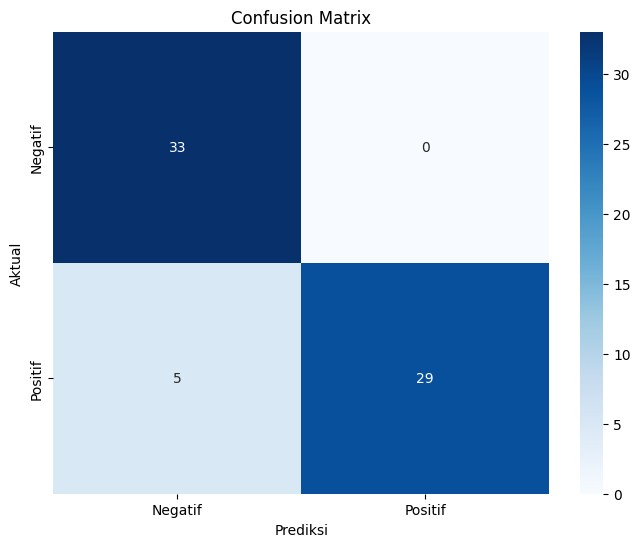

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Model ensemble yang sudah Anda latih
model = ensemble_model

# Melakukan prediksi pada data uji
y_pred_sv = model.predict(response_test)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred_sv)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()